# MOVIE RECOMMENDATION 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import title
import seaborn as sns

In [2]:
# Importing dataset
movies = pd.read_csv('tmdb_movies_data.csv')

In [3]:
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


## PREPROCESSING DATASET

In [4]:
movies.shape

(10866, 21)

In [5]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of movies budget')

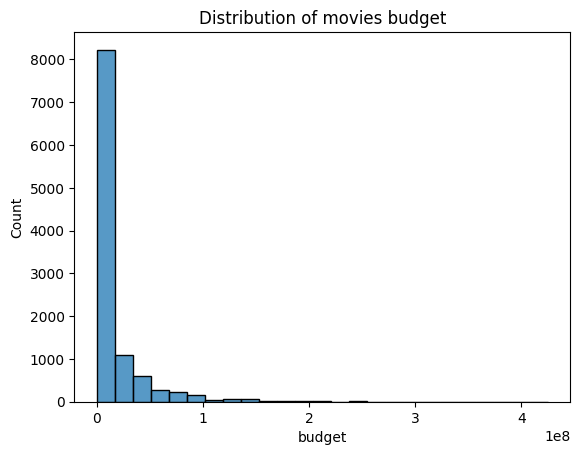

In [6]:
sns.histplot(data=movies, x='budget', bins=25)
title("Distribution of movies budget")

Text(0.5, 1.0, 'Distribution of movies by their release year')

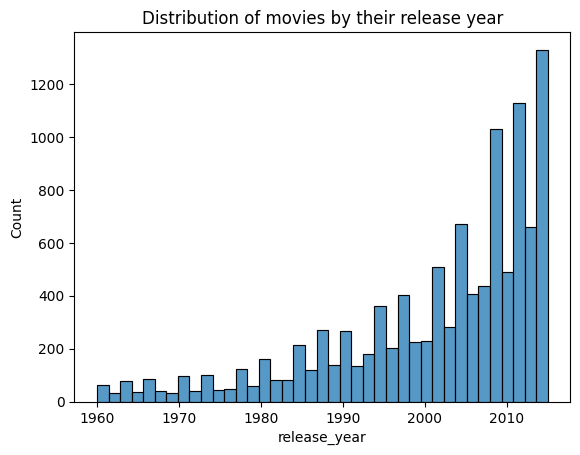

In [7]:
sns.histplot(data=movies, x='release_year')
title("Distribution of movies by their release year")

Text(0.5, 1.0, 'Distribution of movies revenue')

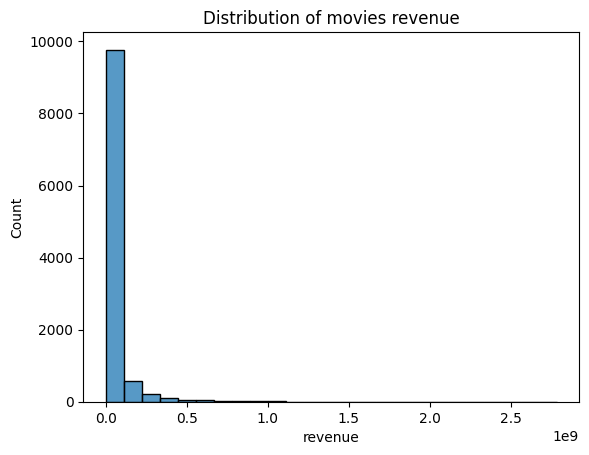

In [8]:
sns.histplot(data=movies, x='revenue', bins=25)
title("Distribution of movies revenue")

Text(0.5, 1.0, "Distribution of movies's average vote")

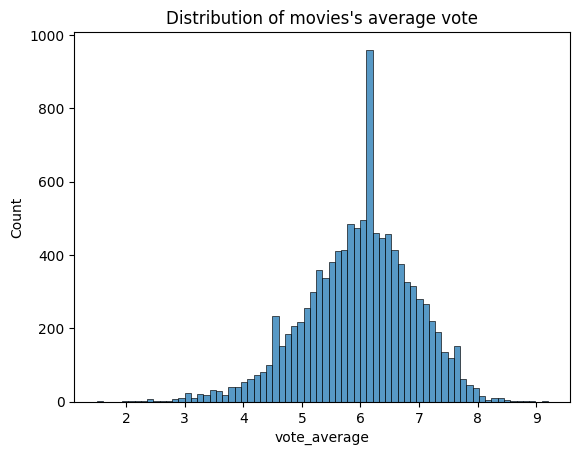

In [9]:
sns.histplot(data=movies, x='vote_average')
title("Distribution of movies's average vote")

Text(0.5, 1.0, "Distribution of movie's runtime(in mins)")

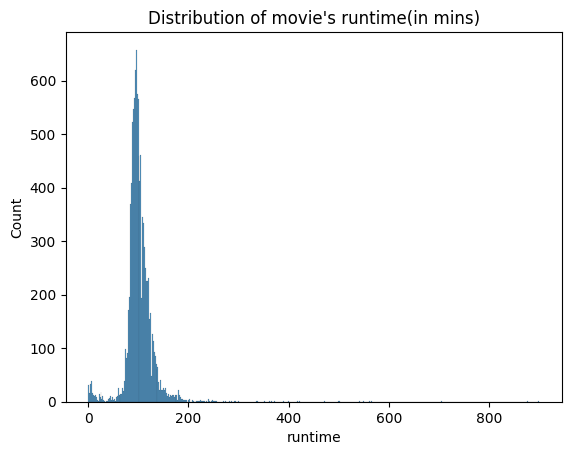

In [10]:
sns.histplot(data=movies, x='runtime')
title("Distribution of movie's runtime(in mins)")

In [11]:
# Removing unnecessary columns from the dataframe

movies.drop(columns=['imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'tagline', 'runtime', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'], inplace=True)

In [12]:
movies.columns

Index(['id', 'original_title', 'cast', 'director', 'keywords', 'overview',
       'genres'],
      dtype='object')

In [13]:
movies.rename(columns={'original_title': 'title', 'director': 'crew'}, inplace=True)

In [14]:
movies.columns

Index(['id', 'title', 'cast', 'crew', 'keywords', 'overview', 'genres'], dtype='object')

In [15]:
# Checking for Null/NaN values in data
movies.isnull().sum()

id             0
title          0
cast          76
crew          44
keywords    1493
overview       4
genres        23
dtype: int64

In [16]:
# Dropping Null/NaN values
movies.fillna('', inplace=True)

In [17]:
movies.isnull().sum()

id          0
title       0
cast        0
crew        0
keywords    0
overview    0
genres      0
dtype: int64

In [18]:
movies['genres'].iloc[0]

'Action|Adventure|Science Fiction|Thriller'

In [19]:
# Checking for Duplicate values in data
movies.duplicated().sum()

1

In [20]:
# Removing Duplicate values
movies.drop_duplicates(inplace=True)

In [21]:
movies.head(2)

,id,title,cast,crew,keywords,overview,genres
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller


### Formatting data in columns in uniform manner

In [22]:
movies['genres'] = movies['genres'].apply(lambda x: x.replace(" ", ""))

In [23]:
movies['genres'] = movies['genres'].apply(lambda x: x.replace("|", " "))

In [24]:
movies['cast'] = movies['cast'].apply(lambda x: x.replace(" ", ""))

In [25]:
movies['cast'] = movies['cast'].apply(lambda x: x.replace("|", " "))

In [26]:
movies['crew'] = movies['crew'].apply(lambda x: x.replace(" ", ""))

In [27]:
movies['crew'] = movies['crew'].apply(lambda x: x.replace("|", " "))

In [28]:
movies['keywords'] = movies['keywords'].apply(lambda x: x.replace(" ", ""))

In [29]:
movies['keywords'] = movies['keywords'].apply(lambda x: x.replace("|", " "))

In [30]:
movies['cast'] = movies['cast'].apply(lambda x:x.split()[0:3])

In [31]:
movies.head(2)

,id,title,cast,crew,keywords,overview,genres
0,135397,Jurassic World,"[ChrisPratt, BryceDallasHoward, IrrfanKhan]",ColinTrevorrow,monster dna tyrannosaurusrex velociraptor island,Twenty-two years after the events of Jurassic ...,Action Adventure ScienceFiction Thriller
1,76341,Mad Max: Fury Road,"[TomHardy, CharlizeTheron, HughKeays-Byrne]",GeorgeMiller,future chase post-apocalyptic dystopia australia,An apocalyptic story set in the furthest reach...,Action Adventure ScienceFiction Thriller


In [32]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [33]:
movies.sample(2)

,id,title,cast,crew,keywords,overview,genres
7621,13074,Resurrecting the Champ,"[SamuelL.Jackson, JoshHartnett, AlanAlda]",RodLurie,sport,"[Up-and-coming, sports, reporter, rescues, a, ...",Drama
4832,123431,Reincarnated,[SnoopDogg],AndyCapper,,"[Evolution, as, an, artist, is, often, times, ...",Music Documentary


In [34]:
movies['keywords'] = movies['keywords'].apply(lambda x: x.split())

In [35]:
movies['genres'] = movies['genres'].apply(lambda x: x.split())

In [36]:
movies['crew'] = movies['crew'].apply(lambda x: x.split())

In [37]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

## Model Building

In [38]:
df = movies.drop(columns=['overview','genres','keywords','cast','crew'])
df.head()

,id,title,tags
0,135397,Jurassic World,"[Twenty-two, years, after, the, events, of, Ju..."
1,76341,Mad Max: Fury Road,"[An, apocalyptic, story, set, in, the, furthes..."
2,262500,Insurgent,"[Beatrice, Prior, must, confront, her, inner, ..."
3,140607,Star Wars: The Force Awakens,"[Thirty, years, after, defeating, the, Galacti..."
4,168259,Furious 7,"[Deckard, Shaw, seeks, revenge, against, Domin..."


In [39]:
df['tags'] = df['tags'].apply(lambda x: " ".join(x))
df.head()

,id,title,tags
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...


In [40]:
df['tags'] = df['tags'].apply(lambda x: x.lower())

In [41]:
df.head()

,id,title,tags
0,135397,Jurassic World,twenty-two years after the events of jurassic ...
1,76341,Mad Max: Fury Road,an apocalyptic story set in the furthest reach...
2,262500,Insurgent,beatrice prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,thirty years after defeating the galactic empi...
4,168259,Furious 7,deckard shaw seeks revenge against dominic tor...


In [42]:
import nltk

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
def stem(txt):
    y = []
    for i in txt.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [45]:
df['tags'] = df['tags'].apply(stem)

### Using Count vectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [47]:
vector = cv.fit_transform(df['tags']).toarray()

In [48]:
vector.shape

(10865, 5000)

In [50]:
# cv.get_feature_names()

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
similarity = cosine_similarity(vector)

In [53]:
similarity.shape

(10865, 10865)

In [54]:
# example to check movie id
df[df['title'] == 'The Lego Movie'].index[0]

666

In [55]:
def recommend(movie):
    index = df[df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for idx, val in enumerate(distances[1:6], start=1):
        print(f"   {idx}. {df.iloc[val[0]].title}")

In [56]:
movie = input("Enter a movie name: ").capitalize()
print("Recommended movies are:")
recommend(movie)

Enter a movie name:  batman


Recommended movies are:
   1. Back to the Future Part III
   2. Back to the Future
   3. Grind
   4. The Luck of the Irish
   5. Back in Time


### Using tf-idf vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
model = tfidf.fit_transform(df['tags']).toarray()

In [58]:
similarity2 = cosine_similarity(model)

In [59]:
def recommendTfidf(movie):
    index = df[df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity2[index])),reverse=True,key = lambda x: x[1])
    for idx, val in enumerate(distances[1:6], start=1):
        print(f"   {idx}. {df.iloc[val[0]].title}")

In [60]:
movie = input("Enter a movie name: ").capitalize()
print("Recommended movies are:")
recommend(movie)

Enter a movie name:  batman


Recommended movies are:
   1. Back to the Future Part III
   2. Back to the Future
   3. Grind
   4. The Luck of the Irish
   5. Back in Time


In [63]:
import pickle

In [65]:
pickle.dump(df.to_dict(), open("movies_df.pkl", 'wb'))

In [66]:
pickle.dump(similarity2, open("similarity.pkl", 'wb'))